In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRFRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

import pickle

%matplotlib inline


In [ ]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('https://raw.githubusercontent.com/rifaidimas/PUBG_Prediction/main/data/PUBG_Mobile.csv',sep= ';')
df = df.drop(['Rank', 'Total'],axis = 1)
df

,Name,Team,Match,WWCD,Elims,Placement,Survive_Time,Max_elim_range,In_Damage,Heal,Headshot,Drive_distance,Death,Damage,Assist,Air_drop,Moving_distance,Region,Week,Day
0,NGX.LORD,Nigma Galaxy,5,0,17,37,6817,118,1020,790,5,29154,5,2531,1,0,41193,PMGC East,Weekday 1,one
1,NVOrder,Nova Esports,5,1,10,36,5848,221,1031,353,4,12061,5,1395,6,3,24898,PMGC East,Weekday 1,one
2,NGX.FREAK,Nigma Galaxy,5,0,7,37,7091,174,1308,1086,1,26932,5,1047,3,0,39540,PMGC East,Weekday 1,one
3,NVParaboyyy6,Nova Esports,5,1,7,36,5987,69,1579,754,1,15950,5,2047,7,0,26788,PMGC East,Weekday 1,one
4,NVJimmyyyyy,Nova Esports,5,1,6,36,6029,0,928,400,1,18666,4,1181,3,0,30110,PMGC East,Weekday 1,one
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21546,RSG Luk,RSG,2,0,0,6,1767,0,357,60,0,9705,2,91,0,0,13515,Sea Play-in,Final,one
21547,MJ Romeo,Marjin Esports,3,0,1,3,3536,0,313,1519,0,11684,3,445,2,0,20108,Sea Play-in,Final,one
21548,T2i Ferrari,Talent Esports,5,0,1,3,3089,0,700,149,0,7108,5,446,2,0,13953,Sea Play-in,Final,one
21549,HB Six666,Homebois,2,0,0,2,1841,0,306,254,0,7514,2,224,0,0,11760,Sea Play-in,Final,one


In [ ]:
from sklearn import preprocessing
category_col = [i for i in df.columns if df[i].dtypes == 'O']
labelEncoder = preprocessing.LabelEncoder()

mapping_dict ={}
for col in category_col:
 df[col] = labelEncoder.fit_transform(df[col])

 le_name_mapping = dict(zip(labelEncoder.classes_,

labelEncoder.transform(labelEncoder.classes_)))

 mapping_dict[col]= le_name_mapping
print(mapping_dict)

{'Name': {'1952EVILEYE': 0, '1952Entry': 1, '1952Seawine': 2, '1952Ã¹9Tdegree': 3, '1SHoT': 4, '24k': 5, '2812': 6, '2E ChuaCoong': 7, '2E F1Korea': 8, '2E NamShinnT': 9, '2E Tuanz2K': 10, '33zAMO': 11, '3LWANI': 12, '3TN': 13, '3xALI': 14, '3xCRONUS': 15, '3xKAIZEN': 16, '3xMIRACLE': 17, '3xOREO': 18, '401': 19, '47 8E88': 20, '47 Kns': 21, '47 Lancelot': 22, '47 Mpoz': 23, '47 NOOMza': 24, '47 iQu': 25, '4RVLStonedALL': 26, '4RivalsAppy': 27, '4RivalsEypu1': 28, '4RivalsPEMBURU': 29, '4RivalsR1TH': 30, '4VDannniTFD': 31, '4VahmedTFD': 32, '4VashTFDÃ»': 33, '4VendlessTFD': 34, '4Vleon0pTFD': 35, '52xrageDAKU': 36, '52xrageFASTER': 37, '52xrageFERO': 38, '52xragePain': 39, '52xrageZEN': 40, '66Aimer': 41, '6NAYA': 42, '77Plazza': 43, '7DsGuerreroå¥´': 44, '7DsHard': 45, '7DsJoaco': 46, '7DsKratozyxx': 47, '7DsLucasboyy': 48, '7DsLuisFer': 49, '7REEF': 50, '7SeaAkKuJoD': 51, '7SeaJhukegaNHI': 52, '7SeaMEMO': 53, '7SeaPREC10US': 54, '7SeaRipson': 55, '7SeaXiwanCrazi': 56, '89 2SECx': 57,

In [ ]:
df

,Name,Team,Match,WWCD,Elims,Placement,Survive_Time,Max_elim_range,In_Damage,Heal,Headshot,Drive_distance,Death,Damage,Assist,Air_drop,Moving_distance,Region,Week,Day
0,886,185,5,0,17,37,6817,118,1020,790,5,29154,5,2531,1,0,41193,9,4,2
1,901,189,5,1,10,36,5848,221,1031,353,4,12061,5,1395,6,3,24898,9,4,2
2,884,185,5,0,7,37,7091,174,1308,1086,1,26932,5,1047,3,0,39540,9,4,2
3,902,189,5,1,7,36,5987,69,1579,754,1,15950,5,2047,7,0,26788,9,4,2
4,898,189,5,1,6,36,6029,0,928,400,1,18666,4,1181,3,0,30110,9,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21546,1040,209,2,0,0,6,1767,0,357,60,0,9705,2,91,0,0,13515,12,0,2
21547,817,176,3,0,1,3,3536,0,313,1519,0,11684,3,445,2,0,20108,12,0,2
21548,1252,255,5,0,1,3,3089,0,700,149,0,7108,5,446,2,0,13953,12,0,2
21549,590,133,2,0,0,2,1841,0,306,254,0,7514,2,224,0,0,11760,12,0,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21551 entries, 0 to 21550
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Name             21551 non-null  int64
 1   Team             21551 non-null  int64
 2   Match            21551 non-null  int64
 3   WWCD             21551 non-null  int64
 4   Elims            21551 non-null  int64
 5   Placement        21551 non-null  int64
 6   Survive_Time     21551 non-null  int64
 7   Max_elim_range   21551 non-null  int64
 8   In_Damage        21551 non-null  int64
 9   Heal             21551 non-null  int64
 10  Headshot         21551 non-null  int64
 11  Drive_distance   21551 non-null  int64
 12  Death            21551 non-null  int64
 13  Damage           21551 non-null  int64
 14  Assist           21551 non-null  int64
 15  Air_drop         21551 non-null  int64
 16  Moving_distance  21551 non-null  int64
 17  Region           21551 non-null  int64
 18  Week  

In [ ]:
X = df.drop(['Survive_Time'],axis = 1)
y = df['Survive_Time']

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state = 0)
print('Jumlah X train:', x_train.shape)
print('Jumlah Y train:', y_train.shape)
print('Jumlah X Test:', x_test.shape)
print('Jumlah Y test:', y_test.shape)

Jumlah X train: (17240, 19)
Jumlah Y train: (17240,)
Jumlah X Test: (4311, 19)
Jumlah Y test: (4311,)


## Decision Tree

In [ ]:
dc = DecisionTreeRegressor()
model1 = dc.fit(x_train,y_train)
pred1 = model1.predict(x_test)
res1 = y_test - pred1

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, pred1))
print('RMSE:{}'.format(np.round(rmse,2)))
print('R square: %.2f' % r2_score(y_test,pred1))
print('RMSE on train data: %.2f' % model1.score(x_train,y_train))


RMSE:599.39
R square: 0.80
RMSE on train data: 1.00


## Random Forest

In [ ]:
rf = RandomForestRegressor()
model2 = rf.fit(x_train,y_train)
pred2 = model2.predict(x_test)
res2 = y_test - pred2

In [ ]:
rmse2 = np.sqrt(mean_squared_error(y_test, pred2))
print('RMSE:{}'.format(np.round(rmse2,2)))
print('R square: %.3f' % r2_score(y_test,pred2))
print('RMSE on train data: %.2f' % model2.score(x_train,y_train))


RMSE:417.05
R square: 0.903
RMSE on train data: 0.99


In [ ]:
def mean_absolute_percentage_error(y_test, pred2): 
  y_true, y_pred = np.array(y_test), np.array(pred2) 
  return np.mean(np.abs((y_test - pred2) / y_test)) * 100 
print (100 - mean_absolute_percentage_error(y_test, pred2))

-inf


## XG Boost

In [ ]:
xgb = XGBRFRegressor()
model3 = xgb.fit(x_train,y_train)
pred3 = model3.predict(x_test)
res3 = y_test - pred3

[07:51:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
rmse3 = np.sqrt(mean_squared_error(y_test, pred3))
print('RMSE:{}'.format(np.round(rmse3,2)))
print('R square: %.3f' % r2_score(y_test,pred3))
print('RMSE on train data: %.2f' % model3.score(x_train,y_train))

RMSE:640.23
R square: 0.771
RMSE on train data: 0.77


## KNN

In [ ]:
knn = KNeighborsRegressor ()
model4 = knn.fit(x_train,y_train)
pred4 = model4.predict(x_test)
res4 = y_test - pred4

In [ ]:
rmse4 = np.sqrt(mean_squared_error(y_test, pred4))
print('RMSE:{}'.format(np.round(rmse4,2)))
print('R square: %.3f' % r2_score(y_test,pred4))
print('RMSE on train data: %.2f' % model4.score(x_train,y_train))

RMSE:487.08
R square: 0.867
RMSE on train data: 0.91


# Tuning Hyperparameter

In [ ]:
param_rand = {
    'min_samples_leaf': [3, 4, 5, 6, 7],
    'n_estimators': [int(x) for x in np.linspace(2, 200,num = 11)]}

random_src = RandomizedSearchCV(model2, param_rand, cv = 10)
random_src.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'min_samples_leaf': [3, 4, 5, 6, 7],
                                        'n_estimators': [2, 21, 41, 61, 81, 101,
                                                         120, 140, 160, 180,
                                                         200]})

In [ ]:
random_src.best_params_

{'n_estimators': 140, 'min_samples_leaf': 4}

## Model Random Forest With Best Model


In [ ]:
rf_rs = RandomForestRegressor(n_estimators = 140,
                              min_samples_leaf = 4)

In [ ]:
mod = rf_rs.fit(x_train, y_train) 
predicted_rf_rs = rf_rs.predict(x_test) 
residual = y_test - predicted_rf_rs

In [ ]:
rmse5 = np.sqrt(mean_squared_error(y_test, predicted_rf_rs))
print('RMSE:{}'.format(np.round(rmse5,2)))
print('RMSE on test data: %.3f' % r2_score(y_test,predicted_rf_rs))
print('RMSE on train data: %.2f' % mod.score(x_train,y_train))

RMSE:419.28
RMSE on test data: 0.902
RMSE on train data: 0.97


In [ ]:
def mean_absolute_percentage_error(y_test, predicted_rf_rs): 
  y_true, y_pred = np.array(y_test), np.array(predicted_rf_rs) 
  return np.mean(np.abs((y_test - predicted_rf_rs) / y_test)) * 100 
print (100 - mean_absolute_percentage_error(y_test, predicted_rf_rs))

92.24255206230785


In [ ]:
importances = rf_rs.feature_importances_
#Sort it
print ("Sorted Feature Importance:")
sorted_feature_importance = sorted(zip(importances*100,
list(x_train)), reverse=True)
print (sorted_feature_importance)

Sorted Feature Importance:
[(68.40713211387883, 'Match'), (9.923890342431383, 'Placement'), (8.88441598753758, 'Moving_distance'), (2.8269745066272316, 'Heal'), (2.820091943286701, 'Damage'), (2.690336795185735, 'Drive_distance'), (0.7073479228453335, 'Team'), (0.7006816946488765, 'Name'), (0.6907213298122258, 'In_Damage'), (0.6296258068891788, 'Region '), (0.3371817441227784, 'Assist'), (0.33118165647102354, 'Max_elim_range'), (0.3192529471961495, 'Elims'), (0.2843690549827764, 'Week'), (0.20404053412144044, 'Day'), (0.10177302998231119, 'Headshot'), (0.05681465583475554, 'Death'), (0.055607566605039516, 'WWCD'), (0.028560367540658927, 'Air_drop')]


In [ ]:
df_new = pd.DataFrame(list(sorted_feature_importance),columns =['Importance %', 'Variabel'])

In [ ]:
df_new = np.round(df_new,1)
df_new

,Importance %,Variabel
0,68.4,Match
1,9.9,Placement
2,8.9,Moving_distance
3,2.8,Heal
4,2.8,Damage
5,2.7,Drive_distance
6,0.7,Team
7,0.7,Name
8,0.7,In_Damage
9,0.6,Region


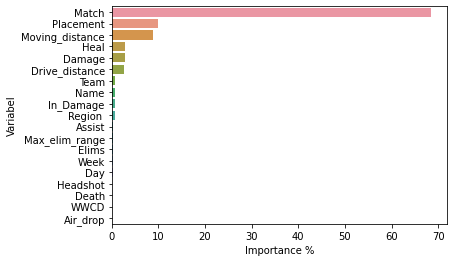

In [ ]:
ax = sns.barplot(x="Importance %", y="Variabel", data=df_new)
sns.color_palette("flare")
                 
plt.show()

In [ ]:
import pickle
# Saving model pickle
pickle.dump(rf_rs, open('model.pkl','wb'))